<a href="https://colab.research.google.com/github/MsAnalyst/Probability-InsuranceAnalysis/blob/main/Intro_to_Proba_FinalProject_Health_Insurance_Analysis(dewi_I4Zs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns
from scipy import stats

#setting default theme
sns.set_theme(style='white', palette='tab20')

## **Data Collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: ignored

In [ ]:
from google.colab import files
data_to_load = files.upload()

## **Data Definition**

Definisi semua fitur yang terdapat pada dataset.

Data Health Insurance berasal dari data latihan Pacmann. Data dapat diakses pada tautan berikut: (Source)

In [ ]:
insurance = pd.read_csv('insurance.csv')
#insurance.style.background_gradient(axis=0,cmap="Blues")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data terlihat bersih, tidak ada data kosong (null).
Hasil menunjukkan terdapat tiga jenis tipe data yakni object, integer, dan float.

Untuk keperluan analisa, diminta klasifikasi BMI di bawah 25 dan di atas 25 serta klasifikasi charges dengan batas $16,700.


## **Data Analysis**

### **1. Descriptive Statistics Analysis**

Proses analisa deskriptif untuk memperoleh gambaran secara umum mengenai karakteristik dari masing-masing variabel yang dilihat dari nilai rata-rata (mean), maximum, dan minimum, standar deviasi, dan lainnya.



```
# This is formatted as code
```

Analisa Variabel Numerik

In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Rata-rata Umur per Kategori**

Rata-rata umur dicari secara keseluruhan dan per kategori yaitu jenis kelamin, status perokok, serta kombinasi 2 kategori yaitu jenis kelamin dengan status perokok.  

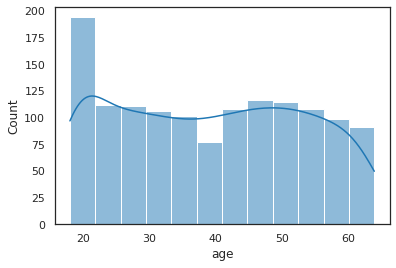

In [ ]:
sns.histplot(insurance.age, kde=True)

In [ ]:
insurance.groupby(['sex'])[['age']].mean().round(2)

,age
sex,
female,39.50
male,38.92


In [ ]:
insurance.groupby(['smoker'])[['age']].mean().round(2)

,age
smoker,
no,39.39
yes,38.51


In [ ]:
insurance.groupby(['sex','smoker'])[['age']].mean().round(2)

age
sex    smoker       
female no      39.69
       yes     38.61
male   no      39.06
       yes     38.45

Rata-rata umur perempuan lebih tinggi dibanding rata-rata umur laki-laki meski tidak berbeda jauh.
Rata-rata umur non-perokok baik yang perempuan dan laki-laki lebih tinggi dibanding rata-rata umur perokok meski tidak berbeda jauh.


**Rata-rata BMI per Kategori**

Melakukan perhitungan rata-rata dari Body Mass Index pengguna yang merokok dengan menggunakan fungsi mean().

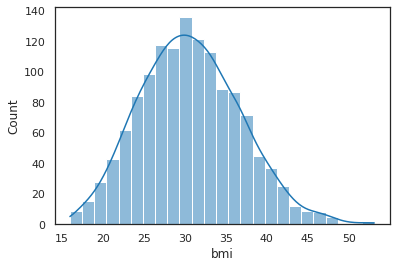

In [ ]:
sns.histplot(insurance.bmi, kde=True)

In [ ]:
insurance.groupby(['sex'])[['bmi']].mean().round(2)

,bmi
sex,
female,30.38
male,30.94


In [ ]:
insurance.groupby(['smoker'])[['bmi']].mean().round(2)

,bmi
smoker,
no,30.65
yes,30.71


In [ ]:
insurance.groupby(['sex','smoker'])[['bmi']].mean().round(2)

bmi
sex    smoker       
female no      30.54
       yes     29.61
male   no      30.77
       yes     31.50

Dengan standar batas ideal 25, maka rata-rata BMI tergolong overweight.
Rata-rata BMI perempuan lebih rendah dibanding yang laki-laki meski tidak berbeda jauh.
Rata-rata BMI perokok lebih tinggi dibanding non-perokok meski tidak berbeda jauh.  

**Rata-rata Tagihan per Kategori**

Melakukan perhitungan rata-rata tagihan dengan menggunakan fungsi mean()

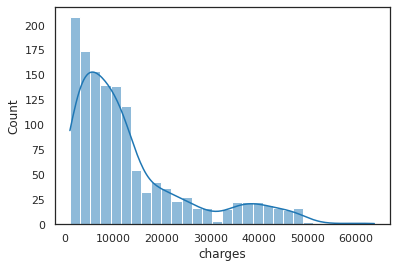

In [ ]:
sns.histplot(insurance.charges, kde=True)

Datanya tidak terdistribusi normal, skewed positif.




In [ ]:
insurance.groupby(['sex'])[['charges']].mean().round()

,charges
sex,
female,12570.0
male,13957.0


In [ ]:
insurance.groupby(['smoker'])[['charges']].mean().round()

,charges
smoker,
no,8434.0
yes,32050.0


In [ ]:
insurance.groupby(['sex','smoker'])[['charges']].mean().round()

charges
sex    smoker         
female no       8762.0
       yes     30679.0
male   no       8087.0
       yes     33042.0

Rata-rata tagihan perempuan lebih rendah dibanding yang laki-laki meski tidak berbeda jauh.
Rata-rata tagihan non-perokok perempuan lebih tinggi dibanding yang non-perokok laki-laki meski tidak berbeda jauh.
Rata-rata tagihan perokok perempuan lebih rendah dibanding yang laki-laki dan keduanya jauh lebih tinggi dari rata-rata tagihan keseluruhan.

**Variansi & Standar Deviasi**


Dari boxplot dapat dilihat bahwa tagihan dari pengguna yang non-perokok $35,925,420 lebih kecil variasinya dibanding yang perokok $133,207,311.

Variasi kemudian diubah menjadi standar deviasi  dan menunjukkan bahwa standar deviasi tagihan non-perokok adalah $11,542 dan perokok adalah $5,994.


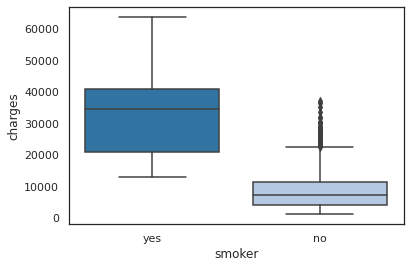

In [ ]:
sns.boxplot(data = insurance, x='smoker', y='charges')

Menghitung variance dari tagihan perokok dan non-perokok

In [ ]:
insurance.groupby(['smoker']).agg({'charges':['std']}).round()

,charges
,std
smoker,
no,5994.0
yes,11542.0


In [ ]:
insurance.groupby(['smoker']).agg({'charges':['var']}).round()

,charges
,var
smoker,
no,35925420.0
yes,133207311.0


Rata-rata tagihan pengguna dengan BMI >25 yang perokok adalah 35,116 lebih tinggi dibanding pengguna dengan BMI>25 yang non-perokok yaitu 8,629 yaitu memiliki selisih 26,487.

**Rata-rata Tagihan BMI>25, Perokok dan Non-Perokok**

Melakukan perhitungan rata-rata tagihan pengguna dengan BMI >25 dan perokok atau non-perokok dengan menggunakan fungsi mean()

In [ ]:
bmi_over_25 = insurance.loc[insurance.bmi>25]
bmi_over_25.loc[bmi_over_25.smoker == 'yes'].charges.mean(), bmi_over_25.loc[bmi_over_25.smoker == 'no'].charges.mean()

(35116.90965694064, 8629.589609712157)

Rata-rata tagihan pengguna dengan BMI >25 yang perokok adalah 35,116 lebih tinggi hampir 4 kali lipat dibanding pengguna dengan BMI>25 yang non-perokok yaitu 8,629.

### **2. Categorical Variables Analysis**


**Gender dengan Tagihan Paling Tinggi.**

In [ ]:
max_female = np.array(insurance['charges'].loc[insurance['sex']=='female']).max()
print('Tagihan tertinggi pengguna perempuan adalah',  '$', round(max_female))
max_male = np.array(insurance['charges'].loc[insurance['sex']=='male']).max()
print('Tagihan tertinggi pengguna laki-laki adalah', '$', round(max_male))



Tagihan tertinggi pengguna perempuan adalah $ 63770
Tagihan tertinggi pengguna laki-laki adalah $ 62593


Tagihan tertinggi ada di data perempuan dengan selisih 1,178.

**Proporsi Perokok dan Non-perokok**

In [ ]:
group_smoker = insurance.groupby(['smoker']).size().reset_index(name='total')
group_smoker['percentage %'] = (((group_smoker.total/insurance.shape[0])*100).round(2))
group_smoker

,smoker,total,percentage %
0,no,1064,79.52
1,yes,274,20.48


**Conditional Probability Perokok dan Non-perokok berdasarkan Gender**

In [ ]:
insurance_smoker = insurance.loc[insurance.smoker=='yes']
group_smoker_gender = insurance_smoker.groupby(['sex']).size().reset_index(name='total_smoker')
group_smoker_gender['probability'] = (((group_smoker_gender.total_smoker/insurance_smoker.shape[0])).round(2))
group_smoker_gender


,sex,total_smoker,probability
0,female,115,0.42
1,male,159,0.58


Dari 1,338 data pengguna asuransi, didapatkan 79.52% adalah perokok dan 20.48% adalah non-perokok.  

Mencari probability perokok per gender, kita gunakan rumus:
P(F|S) = N(F&S)/N(S) sehingga didapatkan
hasil sebanyak 0.42 perokok adalah seorang perempuan.

P(M|S) = N(M&S)/N(S) sehingga didapatkan
hasil sebanyak 0.58 perokok adalah seorang laki-laki.


**Proporsi Pengguna per Wilayah**

In [ ]:
group_region = insurance.groupby(['region']).size().reset_index(name='total')
all = group_region.total.sum()
group_region['percentage %'] = (((group_region.total / all) *100).round(2))
group_region


,region,total,percentage %
0,northeast,324,24.22
1,northwest,325,24.29
2,southeast,364,27.20
3,southwest,325,24.29


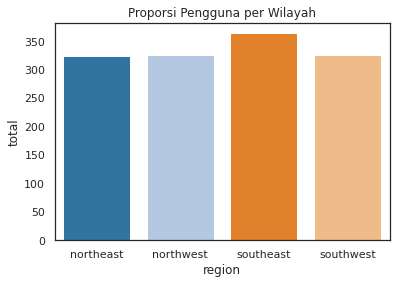

In [ ]:
sns.barplot(data=group_region, x='region', y='total');
plt.title("Proporsi Pengguna per Wilayah")
plt.show()

Proporsi banyak orang di tiap wilayah cukup merata dengan proporsi tertinggi di Southeast.

**Proporsi Tagihan Per Wilayah**

In [ ]:
group_region = (insurance.groupby(['region']).charges.sum().reset_index(name='total_charges').round(0))
total_charges = group_region.total_charges.sum()
group_region ['percentage %'] = (((group_region.total_charges / total_charges) *100).round(2))
group_region

,region,total_charges,percentage %
0,northeast,4343669.0,24.46
1,northwest,4035712.0,22.73
2,southeast,5363690.0,30.21
3,southwest,4012755.0,22.60


Berkorelasi positif dengan proporsi jumlah pengguna, peluang tagihan di Southeast juga memiliki proporsi tertinggi yaitu 30%. Region northwest dan southwest memiliki proporsi 23% dan northeast 24%.

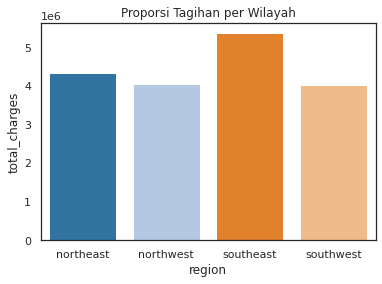

In [ ]:
sns.barplot(data=group_region, x='region', y='total_charges');
plt.title("Proporsi Tagihan per Wilayah")
plt.show()

**Variansi Tagihan per Wilayah**

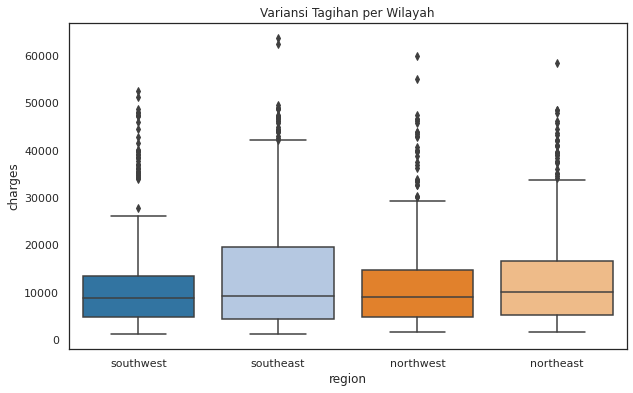

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=insurance, x='region', y='charges')
plt.title("Variansi Tagihan per Wilayah")
plt.show()

Varians atau distribusi tagihan per wilayah secara keseluruhan adalah kurang dari $16,700.

### **3. Continuous Variables Analysis**

**1. Peluang Besar Tagihan Berdasarkan BMI**





In [ ]:
charges_over_16700 = len(insurance[insurance["charges"] > 16700])
bmi_over_25_16700 = len(insurance[(insurance["bmi"] >25) & (insurance["charges"] > 16700)])

charges_over_16700 = len(insurance[insurance["charges"] > 16700])
bmi_under_25_16700 = len(insurance[(insurance["bmi"] <25) & (insurance["charges"] > 16700)])

over_25_cdf = round(bmi_over_25_16700 / charges_over_16700, 4)
under_25_cdf = round(bmi_under_25_16700 / charges_over_16700, 4)

print(f'Peluang Tagihan >16700 Jika BMI >25 : {over_25_cdf}')
print(f'Peluang Tagihan >16700 Jika BMI <25 : {under_25_cdf}')

cdf_table = pd.Series({"BMI >25": over_25_cdf, "BMI <25": under_25_cdf})

plt.bar(cdf_table.index, cdf_table.values, color ="blue")
plt.xlabel("Kategori")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, .4, step=0.2))
plt.title("Peluang Tagihan >$16,700")
plt.show()

NameError: ignored

Hasil dari peluang seorang pengguna dengan BMI>25 mendapat tagihan >$16,700 adalah 0.85

Hasil dari peluang seorang pengguna dengan BMI<25 mendapat tagihan >$16,700 adalah 0.15.

Bisa disimpulkan bahwa semakin besar BMI seorang pengguna, semakin besar peluang tagihan >$16,700.  


**2. Peluang Perokok dan Non-Perokok dengan BMI <25 Dapat Tagihan >16700**

In [ ]:
smoker_bmi_over_25 = insurance [(insurance["bmi"]>25) & (insurance ["smoker"] == "yes")]
non_smoker_bmi_over_25 = insurance [(insurance["bmi"]>25) & (insurance ["smoker"] == "no")]
charges_bmi_over_25_over_16700 = len(insurance[(insurance["bmi"]>25) & (insurance["charges"] > 16700)])

smoker_16700 = len(smoker_bmi_over_25[smoker_bmi_over_25["charges"] > 16700])
non_smoker_16700 = len(non_smoker_bmi_over_25[non_smoker_bmi_over_25["charges"] > 16700])

over_25_smoker_pmf = round(smoker_16700 / charges_bmi_over_25_over_16700, 2)
over_25_non_smoker_pmf = round(non_smoker_16700 / charges_bmi_over_25_over_16700, 2)

print(f'Peluang Perokok dengan BMI >25 : {over_25_smoker_pmf}')
print(f'Peluang Non-perokok dengan BMI >25 : {over_25_non_smoker_pmf}')

pmf_table = pd.Series({"Perokok dengan BMI >25": over_25_smoker_pmf, "Non-perokok dengan BMI >25": over_25_non_smoker_pmf})

plt.bar(pmf_table.index, pmf_table.values, color ="blue")
plt.xlabel("Kategori")
plt.ylabel("PMF f(x)")
plt.yticks(np.arange(0, .4, step=0.2))
plt.title("Peluang Tagihan >$16,700")
plt.show()

Hasil dari peluang seorang perokok dengan BMI>25 mendapat tagihan >16,700 adalah 0.76.

Hasil dari peluang seorang non-perokok dengan BMI>25 mendapat tagihan >16,700 adalah 0.24.

Pengguna dengan BMI >25 yang perokok lebih mungkin mendapat tagihan >16,700 dibanding pengguna dengan BMI>25 yang non-perokok.


**3.Peluang Tagihan 16700 Jika Diketahui Perokok**


Mencari CDF dengan menghitung proporsi dengan conditional CDF.

     P(T>16700 | S)


In [ ]:
smoker_charges_f = len(insurance[(insurance["smoker"] == "yes") & (insurance ["charges"] >16700)])
smoker_len = len(insurance[insurance["smoker"] == "yes"])
pmf = round(smoker_charges_f / smoker_len, 2)
print(f'Peluang Tagihan $16700 Jika Perokok : {pmf}')

Artinya ada peluang 93% seorang pengguna yang merokok memiliki tagihan >$16,700.

### **4. Variables Correlation**

**Korelasi antara BMI dan Tagihan Perokok**

In [ ]:
smoker_data = insurance[insurance["smoker"] == "yes"]
bmi_charges_corr = np.corrcoef(x=smoker_data["bmi"], y=smoker_data["charges"])
bmi_charges_corr

array([[1.        , 0.80648061],
       [0.80648061, 1.        ]])

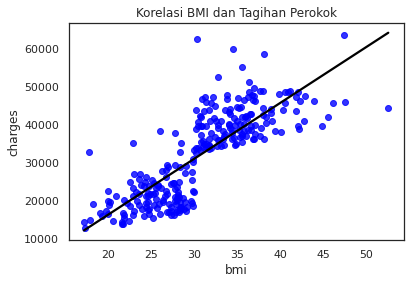

In [ ]:
sns.regplot(x=smoker_data["bmi"],
            y=smoker_data["charges"],
            data=smoker_data,
            ci=None,
            scatter_kws={"color": "blue"}, line_kws={"color":"black"});
plt.title("Korelasi BMI dan Tagihan Perokok")
plt.show()


Berdasarkan visualisasi di atas kita dapat melihat bahwa ada positif korelasi antara tagihan dengan orang merokok. BMI pengguna yang perokok memiliki korelasi positif dengan tagihan dengan score 0.81.


In [ ]:
insurance_smoker.corr().charges.sort_values(ascending=False)

charges     1.000000
bmi         0.806481
age         0.368224
children    0.035945
Name: charges, dtype: float64

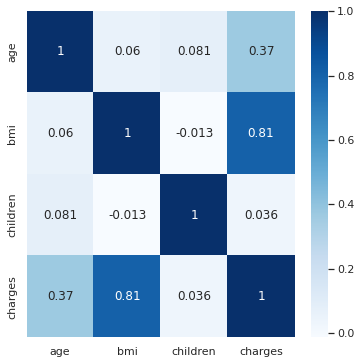

In [ ]:
f,ax= plt.subplots(1,1, figsize=(6,6))
ax= sns.heatmap(insurance_smoker.corr(), annot=True, cmap='Blues')

### *5. Hypothesis Testing*

**1. Tagihan Kesehatan Perokok Lebih Tinggi Dibanding Non-perokok**

- H0:tagihan kesehatan perokok >= tagihan kesehatan non perokok
- H1: tagihan kesehatan perokok  < tagihan kesehatan non perokok
- nilai alpha= 0.05

In [ ]:
perokok= insurance[insurance['smoker']=='yes']
tagihan_perokok= perokok['charges']

In [ ]:
non_perokok= insurance[insurance['smoker']=='no']
tagihan_non_perokok= non_perokok['charges']

In [ ]:
print('variance dari tagihan perokok =', np.var(tagihan_perokok).round(2))
print('variance dari tagihan non perokok =', np.var(tagihan_non_perokok).round(2))

variance dari tagihan perokok = 132721153.14
variance dari tagihan non perokok = 35891656.0


In [ ]:
stat, p_value= stats.ttest_ind(tagihan_perokok,
                              tagihan_non_perokok,
                              alternative='less', equal_var=False)
print(f'p-value: {p_value}')
print(f't-stats: {stat}')

p-value: 1.0
t-stats: 32.751887766341824


In [ ]:
significance= 0.05
if p_value > significance:
  print('Gagal menolak null hypothesis')
else:
  print('menolak null hypothesis')

Gagal menolak null hypothesis


** 2. Tagihan Kesehatan BMI>25 Lebih Tinggi Dibanding BMI<25 **

- H0: Tagihan kesehatan dengan BMI di atas 25 >= tagihan kesehatan dengan BMI di bawah 25
- H1: Tagihan kesehatan dengan BMI di atas 25 < tagihan kesehatan dengan BMI di bawah 25
- nilai alpha= 0.05

In [ ]:
high_bmi_25= insurance[insurance['bmi'] > 25]
low_bmi_25= insurance[insurance['bmi'] < 25]

high_bmi_charges= high_bmi_25['charges']
low_bmi_charges= low_bmi_25['charges']

print('variance dari tagihan untuk bmi > 25 adalah', np.var(high_bmi_charges).round(2))
print('variance dari tagihan untuk bmi < 25 adalah', np.var(low_bmi_charges).round(2))

variance dari tagihan untuk bmi > 25 adalah 164579189.52
variance dari tagihan untuk bmi < 25 adalah 56326859.63


In [ ]:
stat_charges, p_value_charges= stats.ttest_ind(high_bmi_charges,
                              low_bmi_charges,
                              alternative='less', equal_var=False)
print(f'p-value: {p_value_charges}')
print(f't-stats: {stat_charges}')

p-value: 0.9999999974595514
t-stats: 5.929878344096734


In [ ]:
significance= 0.05
if p_value > significance:
  print('Gagal menolak null hypothesis')
else:
  print('menolak null hypothesis')

Gagal menolak null hypothesis


**3. BMI Laki-laki Sama Dengan Perempuan**
- H0: BMI laki-laki = BMI perempuan
- H1: BMI laki-laki != BMI perempuan
- Nilai Alpha= 0.05

In [ ]:
male= insurance[insurance['sex']=='male']
female= insurance[insurance['sex']=='female']

male_bmi= male['bmi']
female_bmi= female['bmi']

print('variance BMI laki-laki=', np.var(male_bmi))
print('variance BMI perempuan=', np.var(female_bmi))

variance BMI laki-laki= 37.64916073639534
variance BMI perempuan= 36.499177033798524


In [ ]:
stat_bmi, p_value_bmi= stats.ttest_ind(male_bmi,
                              female_bmi,equal_var=True)
print(f'p-value: {p_value_bmi}')
print(f't-stats: {stat_bmi}')

p-value: 0.08997637178984932
t-stats: 1.696752635752224


In [ ]:
significance= 0.05
if p_value > significance:
  print('Gagal menolak null hypothesis')
else:
  print('menolak null hypothesis')

Gagal menolak null hypothesis


**# Conclusions and Outcomes**

* Berdasarkan hasil descriptive, categorical, dan continuous analysis, ditemukan bahwa faktor kebiasaan merokok pengguna asuransi memiliki korelasi yang kuat terhadap tagihan kesehatan. Perokok membayar tagihan yang lebih besar dibanding non-perokok.

* Selain merokok, faktor BMI juga memiliki korelasi dengan tagihan, namun korelasinya cenderung lemah. Pengguna asuransi dengan BMI >25 memiliki indikasi akan membayar tagihan kesehatan lebih tinggi dibanding pengguna asuransi dengan BMI <25.

* Sementara, faktor umur juga memiliki korelasi positif dengan besar tagihan, di mana semakin tua seseorang, maka semakin besar tagihan tersebut, namun korelasinya cenderung lemah.

* Faktor jenis kelamin tidak berpengaruh langsung terhadap tagihan, namun berpengaruh langsung terhadap nilai BMI dan kebiasaan merokok di mana persentase jenis kelamin seorang perokok adalah laki-laki lebih besar dibandingkan perempuan.

* Sementara, kesimpulan dari analisis wilayah, didapati jumlah perokok dan rata-rata tagihan tertinggi ada di wilayah Southeast.



**Catatan**



* Dapat dilakukan analisis yang lebih mendalam mengenai faktor jumlah anak yang ditanggung terhadap perilaku merokok dan tagihan kesehatan saat faktor lainnya sama.
* Dapat dilakukan analisis yang lebih mendalam mengenai riwayat penyakit yang memiliki korelasi kuat terhadap besar tagihan kesehatan.  
* Dapat dilakukan uji statistik untuk beberapa macam jumlah sampel.


**Referensi**


* Introduction to Probability, Dimitri P. Bertsekas & John N. Tsitsiklis Chapter 4.5 Covariance and Correlation
* Probability and Statistics for Engineers and Scientist, Ronald E. Walpole et. all Chapter 10 - One and Two-Sample Tests of Hypotheses
* Rumus Varians Data Tunggal dan Varians Data Kelompok, Ibnal Farabi, Zenius.net.

